In [1]:
import pandas as pd
import numpy as np
from decouple import config
import psycopg2
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def get_connection():
    conn = psycopg2.connect(
        dbname=config('DB_NAME'),
        user=config('DB_USER'),
        password=config('DB_PASSWORD'),
        host=config('DB_HOST')
    )
    return conn


conn = get_connection()
cur = conn.cursor()
df = pd.read_sql_query('select * from "raw_data"', conn)
conn.close()

/tmp/ipykernel_364807/212355832.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from "raw_data"', conn)


In [3]:
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,None,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,None,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,None,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,None,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,None,None,no,no,no,no,no,759000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52592 entries, 0 to 52591
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52592 non-null  object 
 1   city                  52592 non-null  object 
 2   type                  40942 non-null  object 
 3   squareMeters          52592 non-null  float64
 4   rooms                 52592 non-null  float64
 5   floor                 43065 non-null  float64
 6   floorCount            51842 non-null  float64
 7   buildYear             43467 non-null  float64
 8   latitude              52592 non-null  float64
 9   longitude             52592 non-null  float64
 10  centreDistance        52592 non-null  float64
 11  poiCount              52592 non-null  float64
 12  schoolDistance        52542 non-null  float64
 13  clinicDistance        52340 non-null  float64
 14  postOfficeDistance    52519 non-null  float64
 15  kindergartenDistanc

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,52592.0,58.830142,21.250642,25.000000,44.36000,55.000000,69.00000,1.500000e+02
rooms,52592.0,2.681929,0.910070,1.000000,2.00000,3.000000,3.00000,6.000000e+00
floor,43065.0,3.313108,2.514338,1.000000,2.00000,3.000000,4.00000,2.900000e+01
floorCount,51842.0,5.229004,3.283571,1.000000,3.00000,4.000000,6.00000,2.900000e+01
buildYear,43467.0,1984.493961,33.981805,1850.000000,1965.00000,1991.000000,2014.00000,2.023000e+03
latitude,52592.0,52.043787,1.339533,49.979110,51.11406,52.195252,52.43680,5.460646e+01
longitude,52592.0,19.511684,1.779307,14.447127,18.52770,19.902880,20.99466,2.320713e+01
centreDistance,52592.0,4.359606,2.876144,0.020000,2.01000,3.960000,6.14000,1.694000e+01
poiCount,52592.0,20.294417,23.765901,0.000000,7.00000,13.000000,24.00000,2.080000e+02
schoolDistance,52542.0,0.417065,0.478467,0.004000,0.17500,0.290000,0.46800,4.818000e+00


In [6]:
df.duplicated().sum()

17360

In [7]:
df.isnull().sum()

id                          0
city                        0
type                    11650
squareMeters                0
rooms                       0
floor                    9527
floorCount                750
buildYear                9125
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             50
clinicDistance            252
postOfficeDistance         73
kindergartenDistance       49
restaurantDistance        154
collegeDistance          1572
pharmacyDistance           79
ownership                   0
buildingMaterial        20505
condition               39819
hasParkingSpace             0
hasBalcony                  0
hasElevator              2688
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64

In [8]:
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.isnull().sum()

id                          0
city                        0
type                     7783
squareMeters                0
rooms                       0
floor                    6309
floorCount                466
buildYear                6075
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             31
clinicDistance            169
postOfficeDistance         48
kindergartenDistance       32
restaurantDistance        111
collegeDistance          1052
pharmacyDistance           52
ownership                   0
buildingMaterial        14131
condition               26698
hasParkingSpace             0
hasBalcony                  0
hasElevator              1769
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64

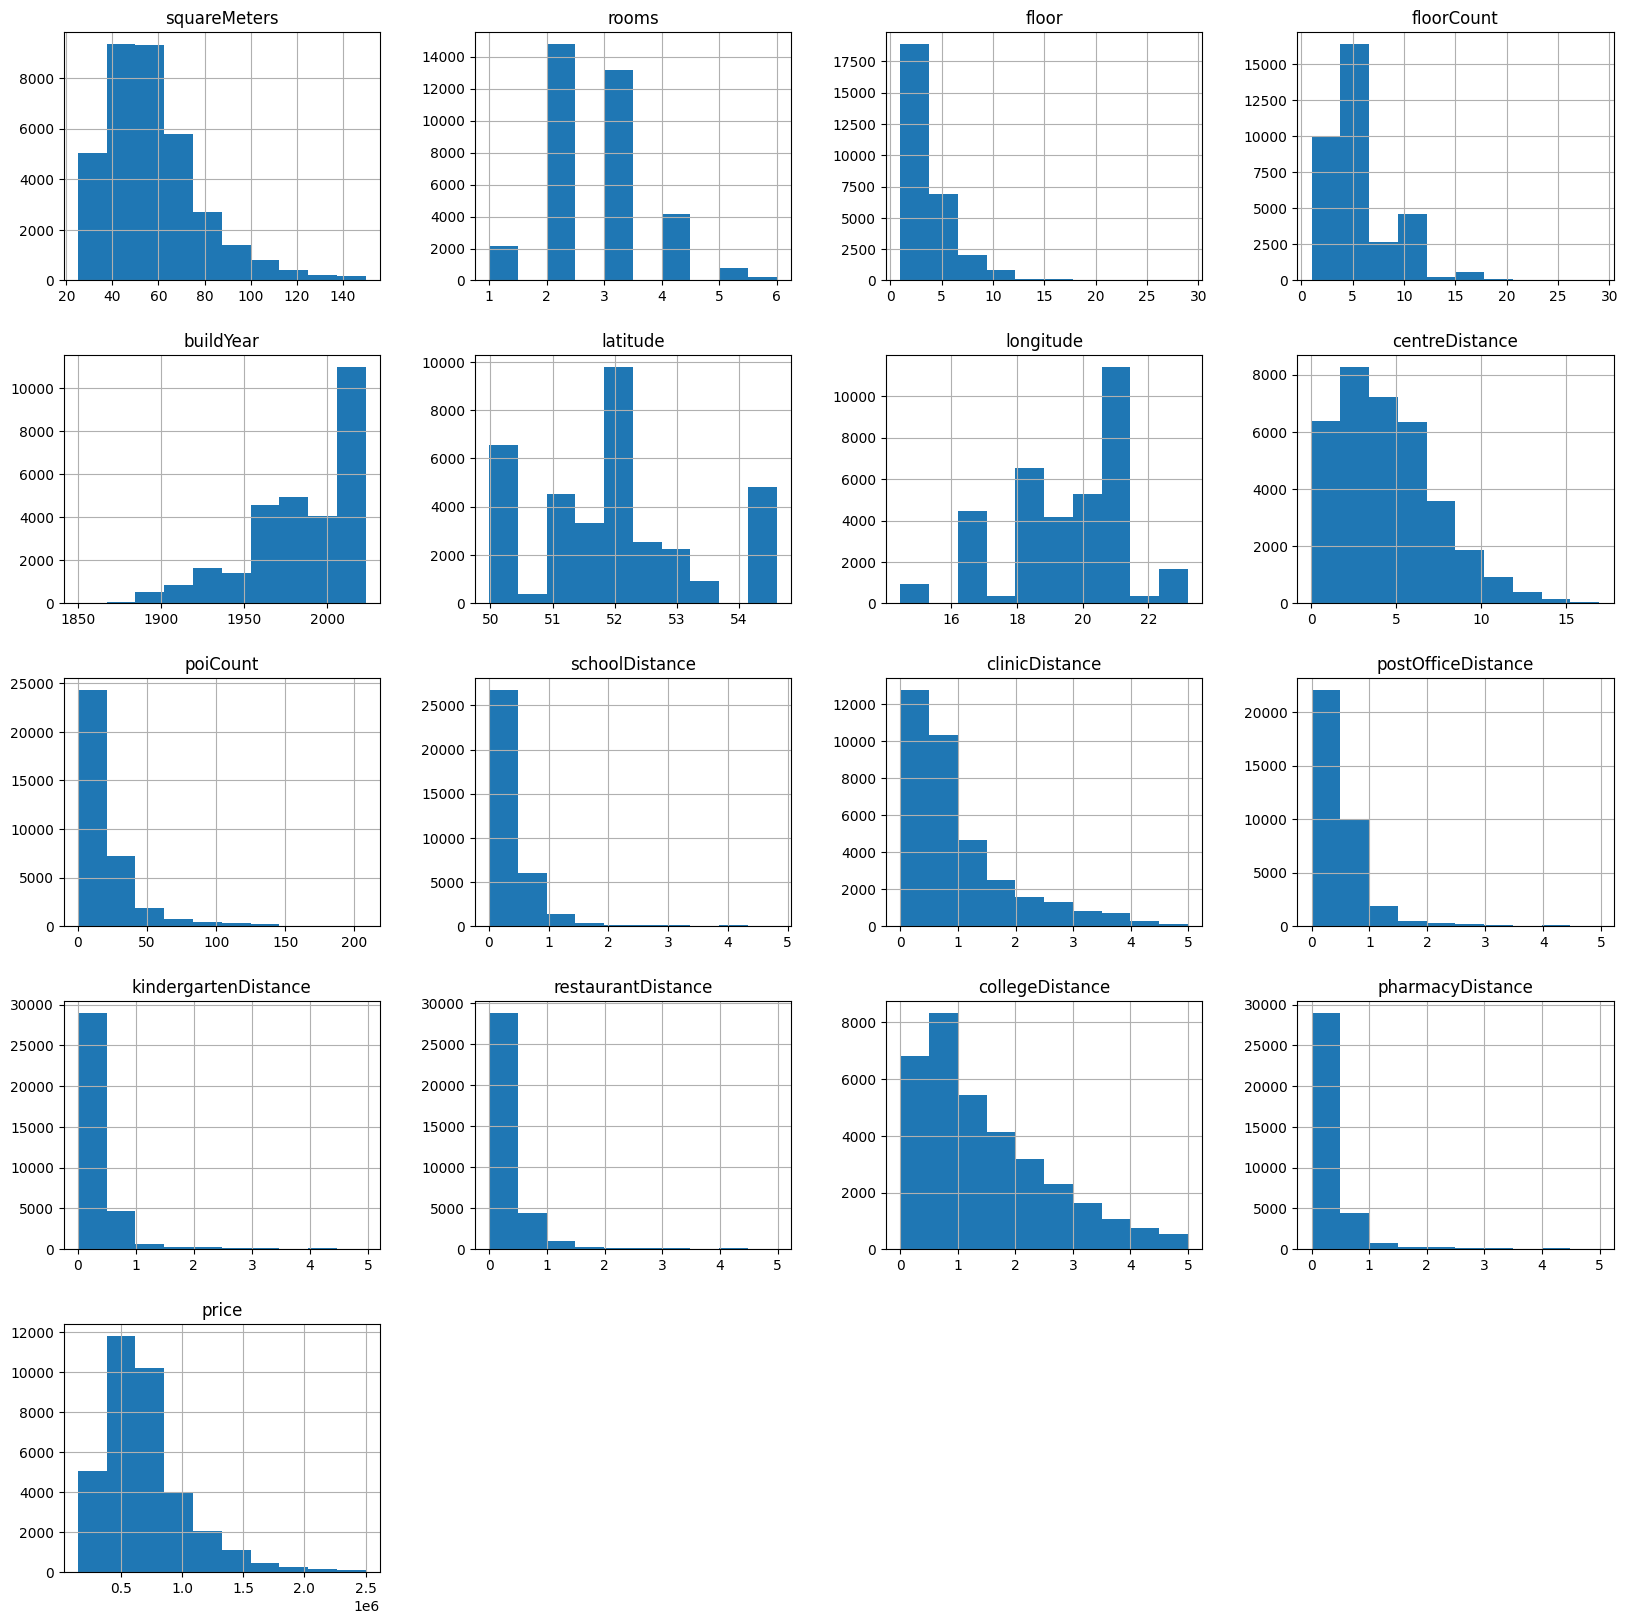

In [10]:
# check for distribution of data
df.hist(figsize=(20, 20))
plt.show()

In [11]:
def fill_missing_distance(df, column):
    df[column] = df[column].transform(lambda x: 10 if pd.isna(x) else x)
    return df

for cols in ['collegeDistance', 'clinicDistance', 'restaurantDistance', 'pharmacyDistance', 'postOfficeDistance', 'kindergartenDistance', 'schoolDistance']:
    df = fill_missing_distance(df, cols)

In [12]:
df.isnull().sum()

id                          0
city                        0
type                     7783
squareMeters                0
rooms                       0
floor                    6309
floorCount                466
buildYear                6075
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance              0
clinicDistance              0
postOfficeDistance          0
kindergartenDistance        0
restaurantDistance          0
collegeDistance             0
pharmacyDistance            0
ownership                   0
buildingMaterial        14131
condition               26698
hasParkingSpace             0
hasBalcony                  0
hasElevator              1769
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64

In [13]:
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,None,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,None,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,None,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,None,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,None,None,no,no,no,no,no,759000


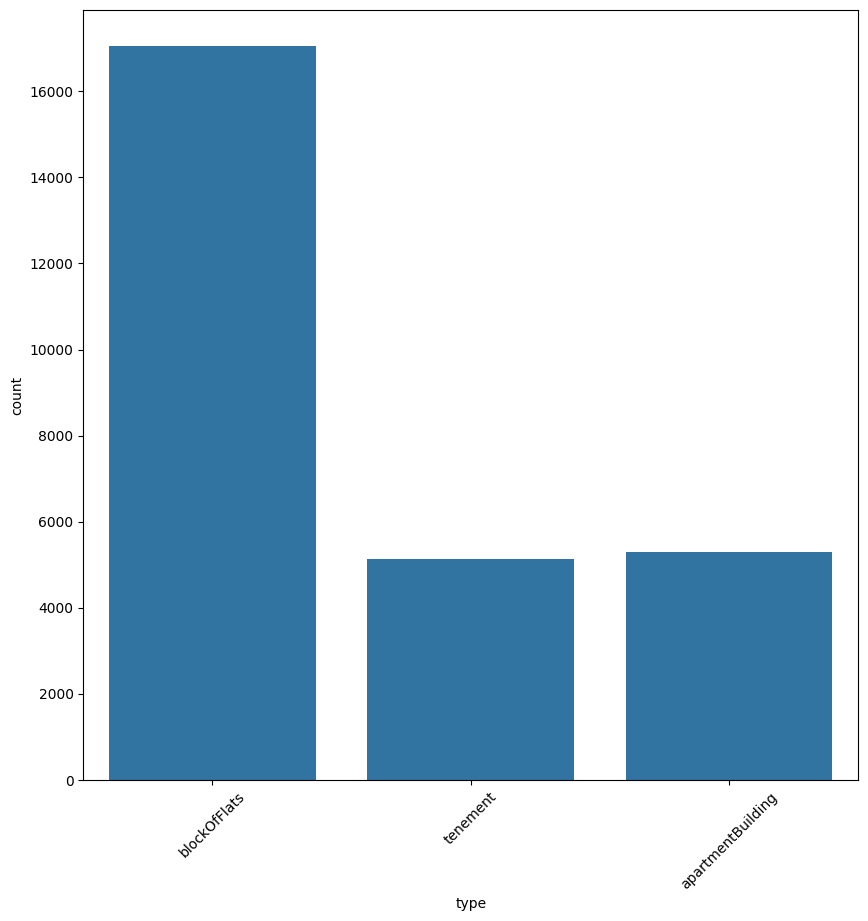

In [14]:
#plot distribution of of type column
plt.figure(figsize=(10, 10))
sns.countplot(x='type', data=df)
plt.xticks(rotation=45)
plt.show()

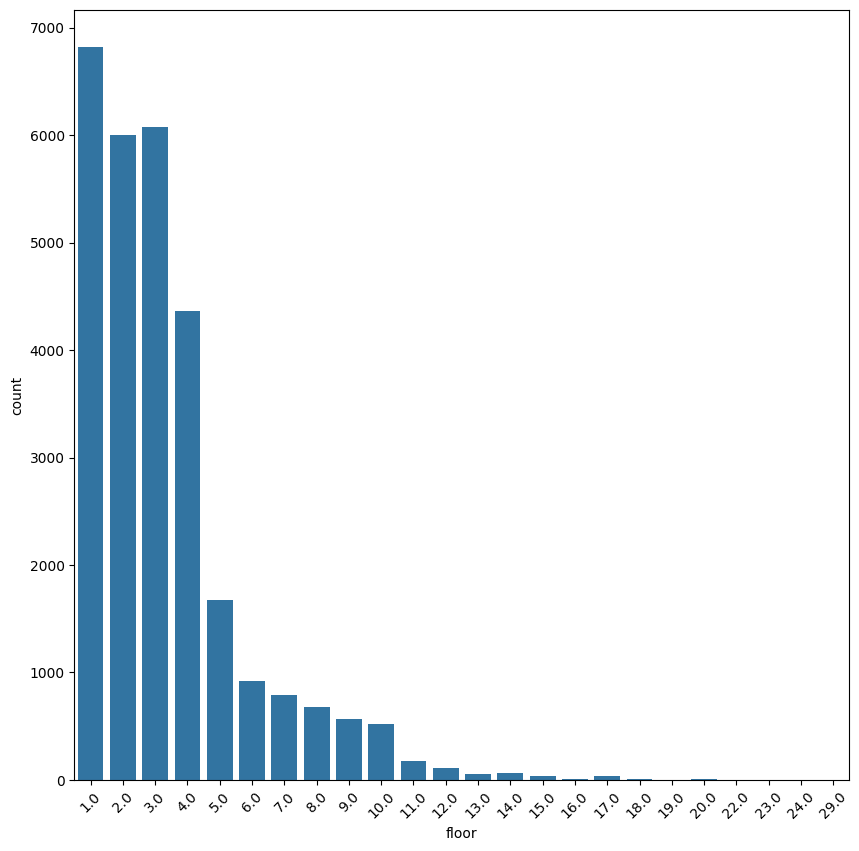

In [15]:
plt.figure(figsize=(10, 10))
sns.countplot(x='floor', data=df)
plt.xticks(rotation=45)
plt.show()

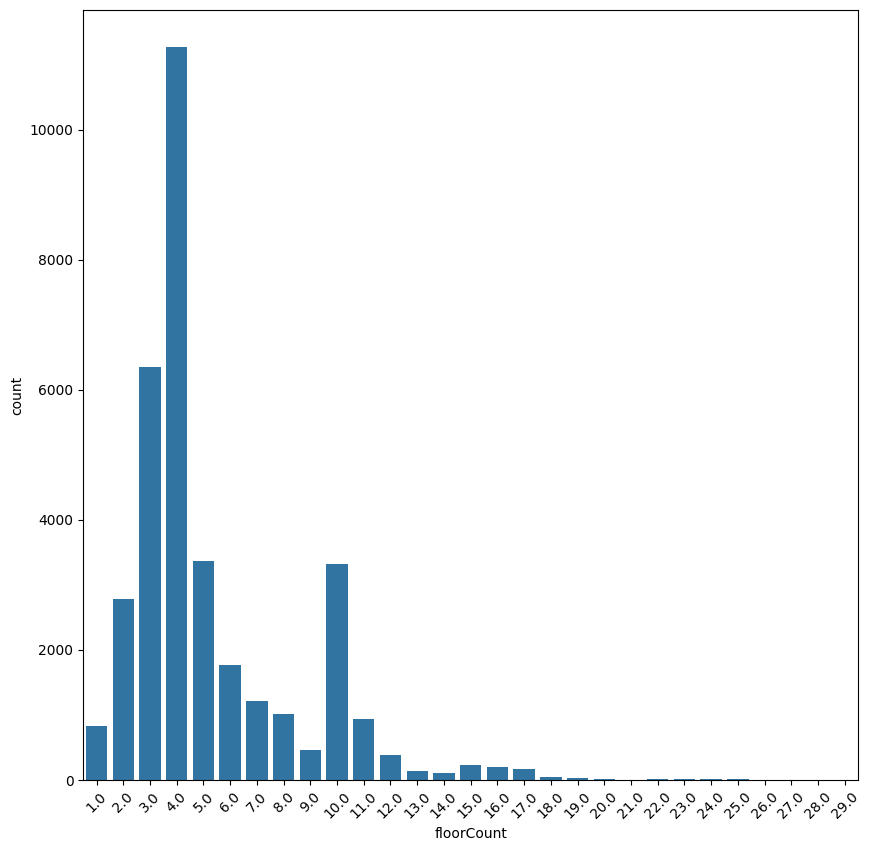

In [16]:
plt.figure(figsize=(10, 10))
sns.countplot(x='floorCount', data=df)
plt.xticks(rotation=45)
plt.show()

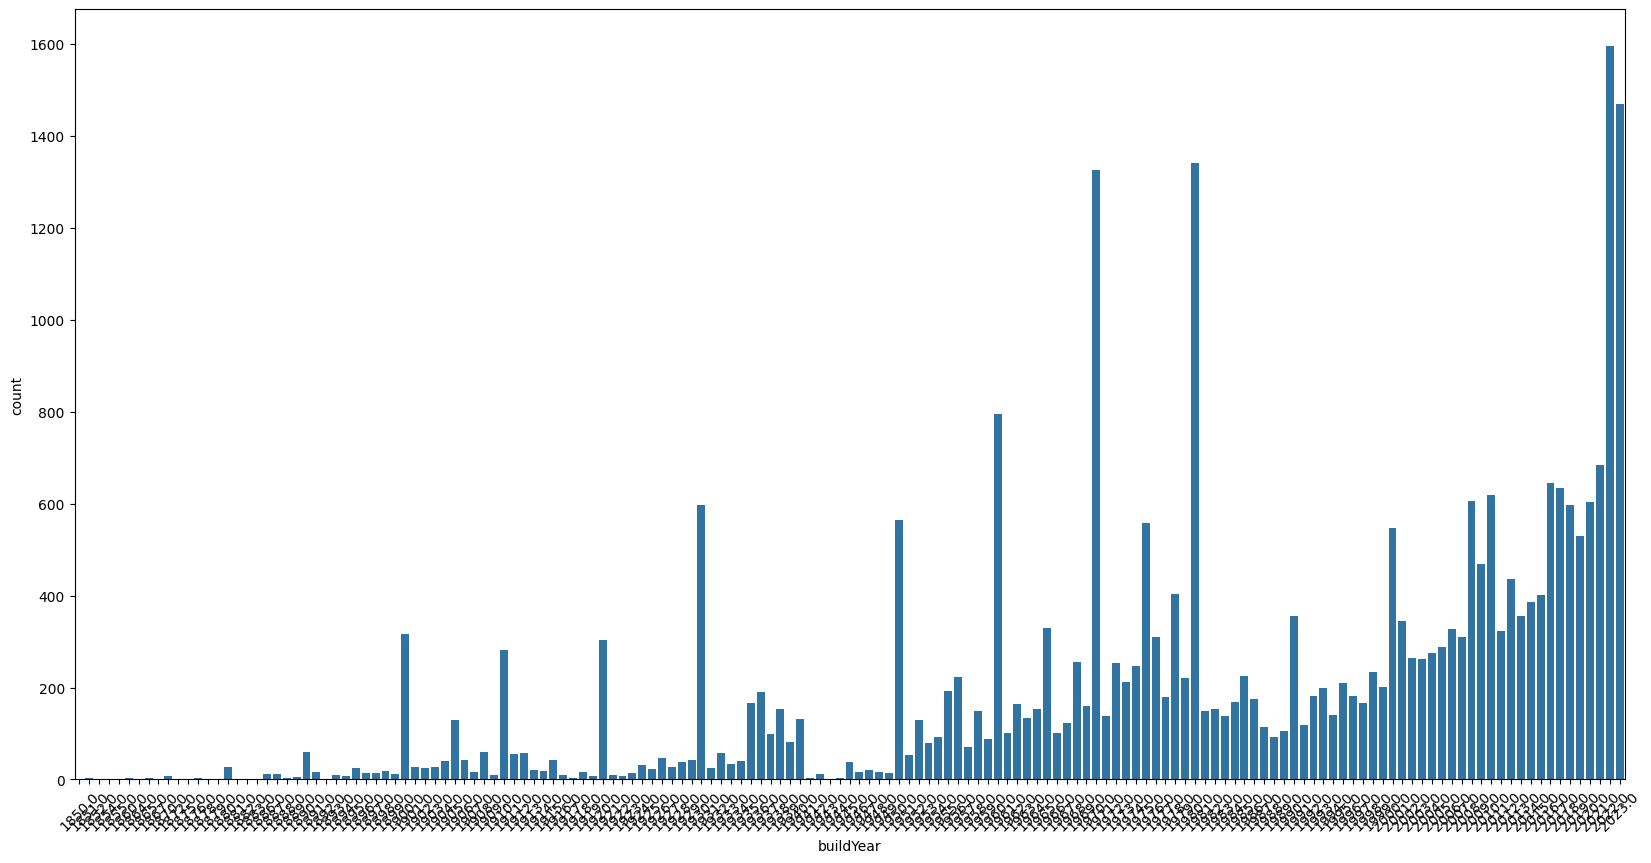

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(x='buildYear', data=df)
plt.xticks(rotation=45)
plt.show()

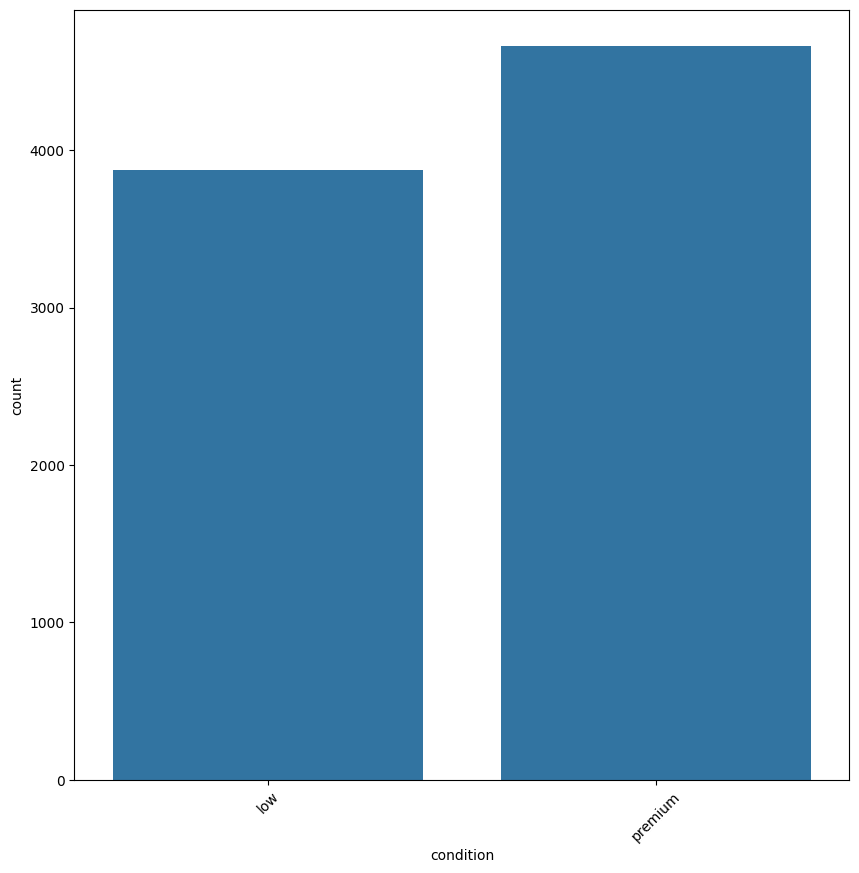

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(x='condition', data=df)
plt.xticks(rotation=45)
plt.show()

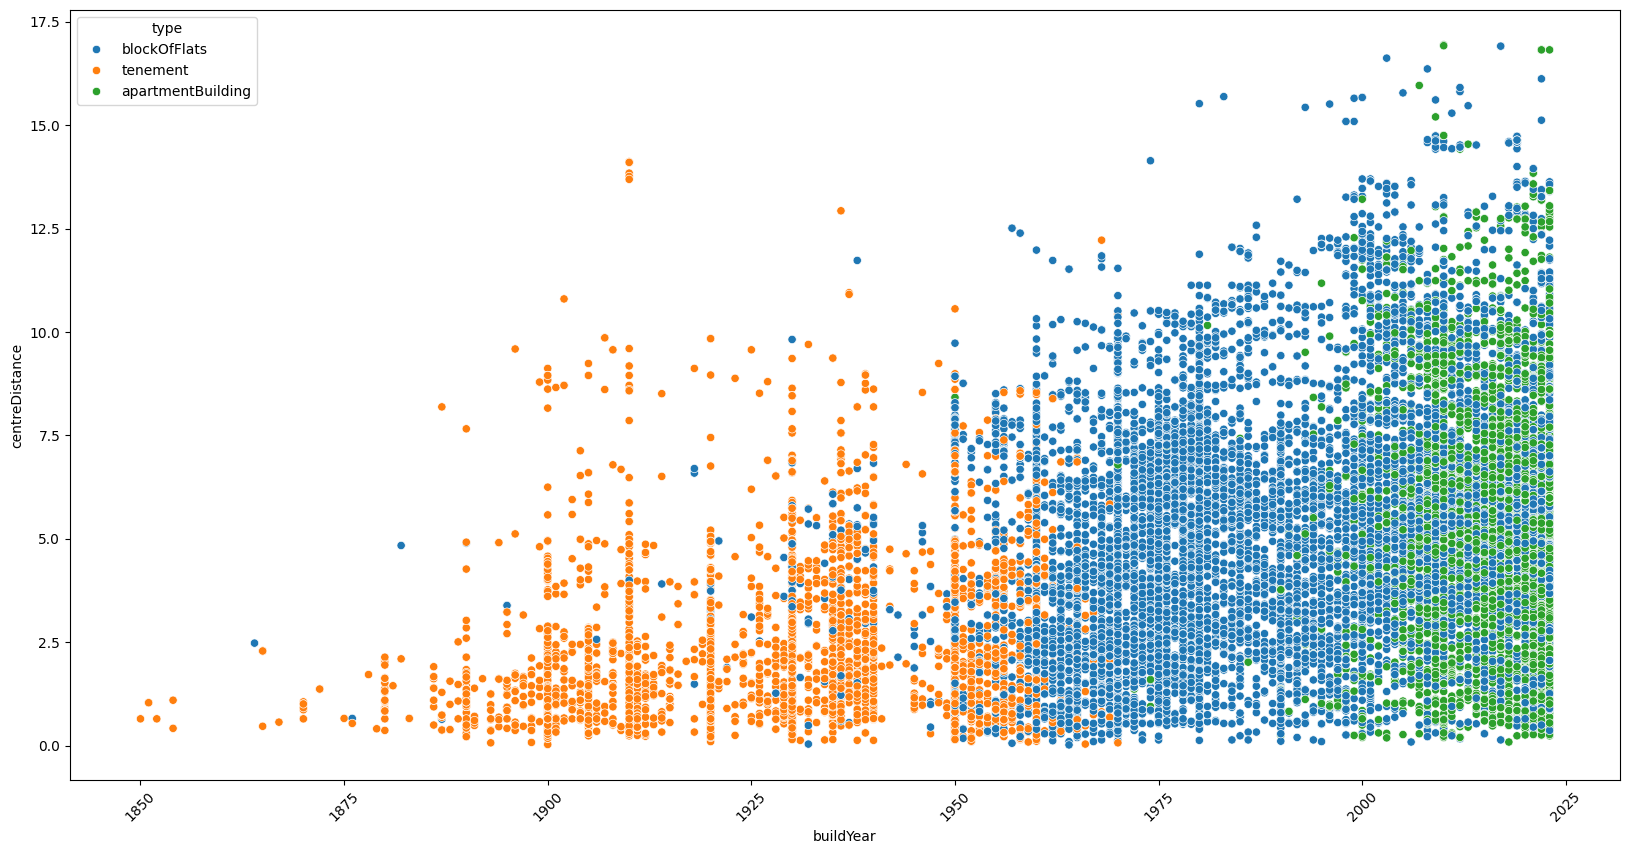

In [19]:
# distribution of buildYear with nan values with centreDistance 
plt.figure(figsize=(20, 10))
sns.scatterplot(x='buildYear', y='centreDistance', data=df, hue='type')
plt.xticks(rotation=45)
plt.show()

In [20]:
def fill_missing_type(df, column):
    df[column] = df.apply(lambda x: 'tenement' if (pd.isna(x['type']) and  x['buildYear'] < 1960) else x['type'], axis=1)
    df[column] = df.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['buildYear'] < 2000) else x['type'], axis=1)
    df[column] = df.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['ownership'] == 'cooperative') else x['type'], axis=1)
    df[column] = df.apply(lambda x: ('blockOfFlats' if(np.random.randint(0, 2) == 0) else 'apartmentBuilding') if (pd.isna(x['type'])) else x['type'], axis=1)
    return df

def fill_missing_material(df, column):
    df[column] = df.apply(lambda x: 'concreteSlab' if (pd.isna(x['buildingMaterial']) and x['buildYear'] >= 1960 and x['buildYear'] <= 1980) else x['buildingMaterial'], axis=1)
    df[column] = df.apply(lambda x: 'brick' if pd.isna(x['buildingMaterial']) else x['buildingMaterial'], axis=1)
    return df

def fill_missing_floorCount(df, column):
    df[column] = df.apply(lambda x: max(x['floor'], 4) if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
    df[column] = df.apply(lambda x: 4 if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
    return df

def fill_missing_floor(df, column):
    df[column] = df.apply(lambda x: np.random.randint(1, x['floorCount']+1) if pd.isna(x['floor']) else x['floor'], axis=1)
    return df

def fill_missing_elevator(df, column):
    df[column] = df.apply(lambda x: 'no' if (pd.isna(x['hasElevator']) and x['floorCount'] <= 4) else x['hasElevator'], axis=1)
    df[column] = df.apply(lambda x: 'yes' if (pd.isna(x['hasElevator']) and x['floorCount'] > 4) else x['hasElevator'], axis=1)
    return df

def fill_missing_buildYear(df, column):
    df[column] = df.apply(lambda x: round(np.random.normal(loc=1925, scale=25)) if (pd.isna(x['buildYear']) and  x['type'] == 'tenement') else x['buildYear'], axis=1)
    df[column] = df.apply(lambda x: (2023 - round(abs(np.random.normal(loc=0, scale=15)))) if (pd.isna(x['buildYear']) and  x['type'] == 'apartmentBuilding') else x['buildYear'], axis=1)
    df[column] = df.apply(lambda x: round(np.random.normal(loc=1970, scale=15)) if (pd.isna(x['buildYear']) and  x['type'] == 'blockOfFlats') else x['buildYear'], axis=1)
    return df

df = fill_missing_type(df, 'type')
df = fill_missing_material(df, 'buildingMaterial')
df = fill_missing_floorCount(df, 'floorCount')
df = fill_missing_floor(df, 'floor')
df = fill_missing_elevator(df, 'hasElevator')
df = fill_missing_buildYear(df, 'buildYear')



In [21]:
df.isnull().sum()

id                          0
city                        0
type                        0
squareMeters                0
rooms                       0
floor                       0
floorCount                  0
buildYear                   0
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance              0
clinicDistance              0
postOfficeDistance          0
kindergartenDistance        0
restaurantDistance          0
collegeDistance             0
pharmacyDistance            0
ownership                   0
buildingMaterial            0
condition               26698
hasParkingSpace             0
hasBalcony                  0
hasElevator                 0
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64